### Imports

In [1]:
## import essential modules 
import qumcmc 
from qumcmc.basic_utils import *
from qumcmc.energy_models import *
from qumcmc.classical_mcmc_routines import *
from qumcmc.quantum_mcmc_routines_qulacs import *     #for Qulacs Simulator backend
# from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 
from typing import Union
from qumcmc.trajectory_processing import *
from qumcmc.training import *

import seaborn as sns
import pandas as pd
import json
#############
import random
from qulacs import QuantumState
from qulacs_core import DensityMatrix

from qiskit.visualization import plot_histogram

def int_to_str(state_obtained, nspin):
    return f"{state_obtained:0{nspin}b}"

In [2]:
def run_sampling_task(nspin, seed, beta, steps):
    
    model = random_ising_model(nspin, seed, print_model=False)
    model_ems =Exact_Sampling(model, beta= beta)
    initial = model_ems.boltzmann_pd.get_sample(1)[0]
    ## run mcmc ##
    clchain =classical_mcmc(
        n_hops=steps,
        model=model,
        temperature=1/beta,
        initial_state=initial,
        verbose= True
    )
    qchain =quantum_enhanced_mcmc(
        n_hops=steps,
        model=model,
        temperature=1/beta,
        initial_state=initial,
        verbose= True
    )
    ## save data ##
    trajectory_data = {};trajectory_data['model_seed'] = seed; trajectory_data['beta'] = beta
    trajectory_data['classical'] = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
    trajectory_data['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})

    return trajectory_data


In [7]:
def get_sampling_data_just_local_sampling(nspin, seed, beta, steps):
    
    model = random_ising_model(nspin, seed, print_model=False)
    model_ems =Exact_Sampling(model, beta= beta)
    initial = model_ems.boltzmann_pd.get_sample(1)[0]
    ## run mcmc ##
    clchain =classical_mcmc(
        n_hops=steps,
        model=model,
        temperature=1/beta,
        initial_state=initial,
        verbose= True,
        method= 'local'
    )
   
    ## save data ##
    # trajectory_data_cl_local = {};trajectory_data_cl_local['model_seed'] = seed; trajectory_data_cl_local['beta'] = beta
    trajectory_data_cl_local = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
    # trajectory_data_cl_local['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})

    return trajectory_data_cl_local


### **CHECKS ON SCALING OF quMCMC CONVERGENCE**

### **5 Qubits**

In [13]:
DATA_5qubit = {}; nspin = 5

##### Experiments

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 16
Entropy : None
---------------------------------------------


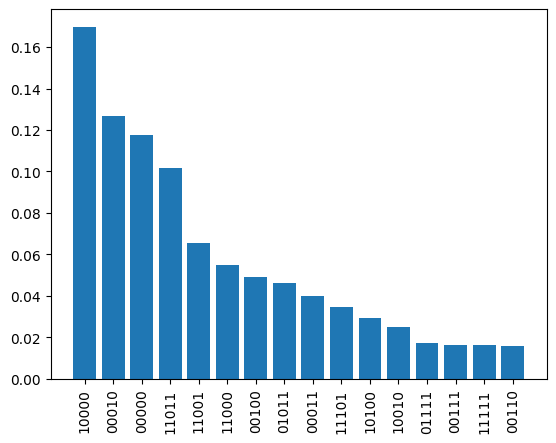

In [4]:
## initialisation ##
seed = 23564
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()


     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 18
Entropy : None
---------------------------------------------


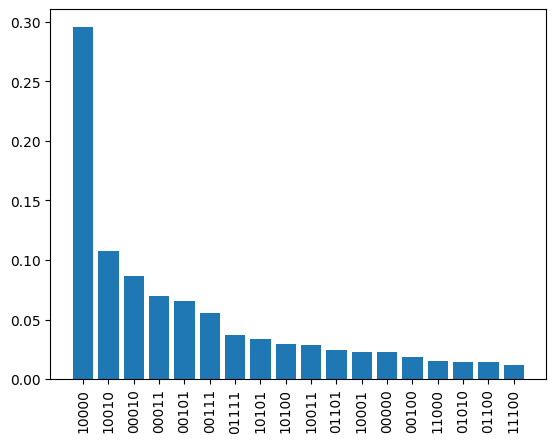

In [5]:
## initialisation ##
seed = 202687
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 19
Entropy : None
---------------------------------------------


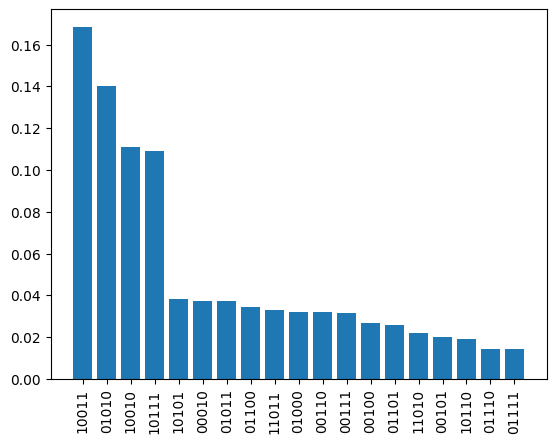

In [6]:
## initialisation ##
seed = 742410
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()


     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 20
Entropy : None
---------------------------------------------


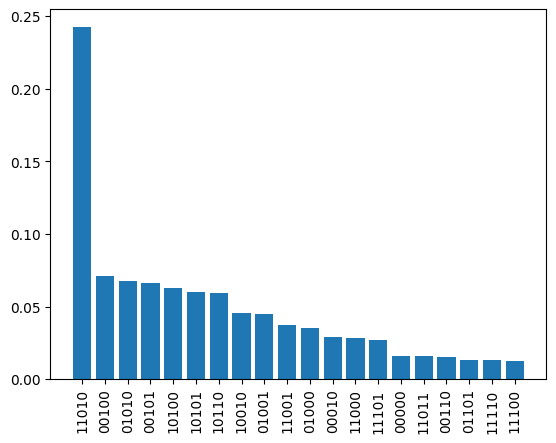

In [7]:
## initialisation ##
seed = 156407
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 19
Entropy : None
---------------------------------------------


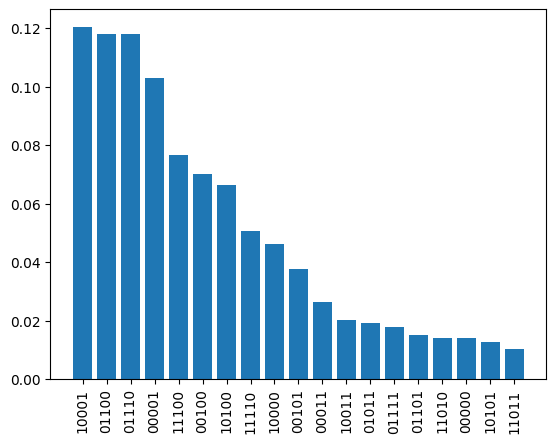

In [8]:
## initialisation ##
seed = 501064
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

#### Data

In [14]:
seeds5q = [23564, 202687, 742410, 156407, 501064]
betas5q = [1.0134]*5

In [10]:
DATA_5qubit = {}; iter = 0
for seed, beta in tqdm(zip(seeds5q, betas5q)):
    iter += 1
    tdata = run_sampling_task(nspin, seed, beta, 5000)
    DATA_5qubit[iter] = tdata
    
DATA_5qubit = pd.DataFrame(DATA_5qubit)
DATA_5qubit.to_json("SamplingData/DATA_5qubit.json")

5it [00:42,  8.56s/it]


In [20]:
## load data-file
with open("SamplingData/DATA_5qubit.json", 'rb') as hndl:
    DATA_5qubit = json.load(hndl)

##REDO classical-local and store relevant data
iter = 0
for seed, beta in tqdm(zip(seeds5q, betas5q)):
    iter += 1
    tdata_jls = get_sampling_data_just_local_sampling(nspin, seed, beta, 5000)
    DATA_5qubit[str(iter)]['classical-local'] = tdata_jls
    
## save data-file
# with open("SamplingData/DATA_5qubit.json", 'wb') as hndl:
#     json.dump()
DATA_5qubit = pd.DataFrame(DATA_5qubit)
DATA_5qubit.to_json("SamplingData/DATA_5qubit.json")

### **10 Qubits**

In [24]:
nspin =10; DATA_10qubit = {}

#### Experiments

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 23
Entropy : 6.326564594091135
---------------------------------------------


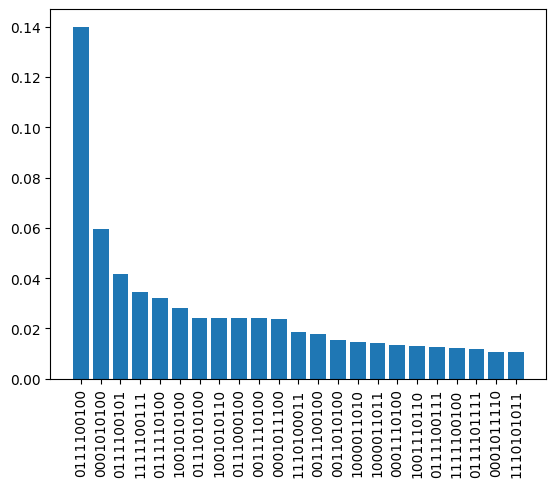

In [4]:
## initialisation ##
seed = 23564; beta = 1.0134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 16
Entropy : 5.393304943832459
---------------------------------------------


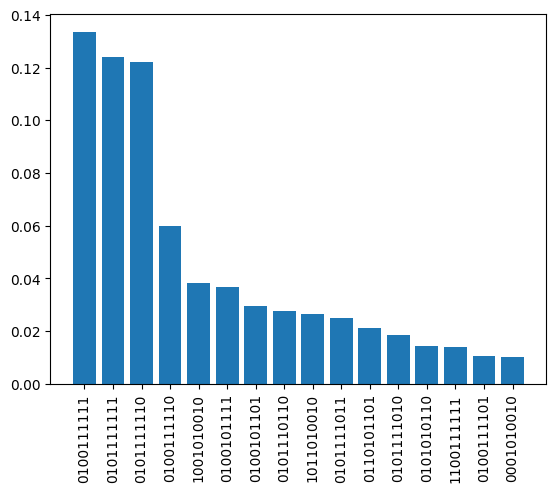

In [5]:
## initialisation ##
seed = 178064; beta = 1.0134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 18
Entropy : 5.7121849389323245
---------------------------------------------


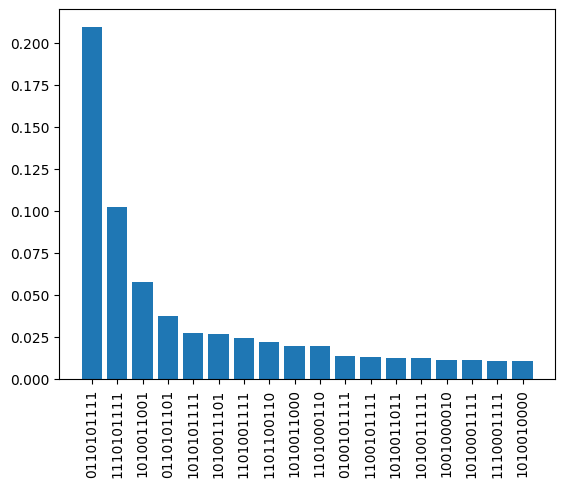

In [6]:
## initialisation ##
seed = 32164; beta = 1.0134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.5634
Num Most Probable States : 21
Entropy : 4.3752934323201105
---------------------------------------------


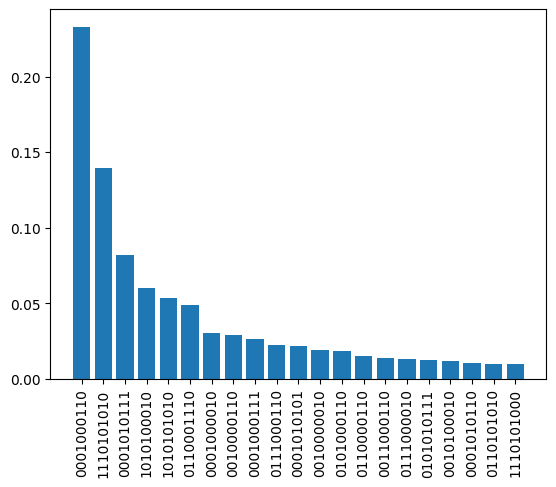

In [7]:
## initialisation ##
seed = 143264; beta = 1.5634
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.12134
Num Most Probable States : 21
Entropy : 5.220367383148227
---------------------------------------------


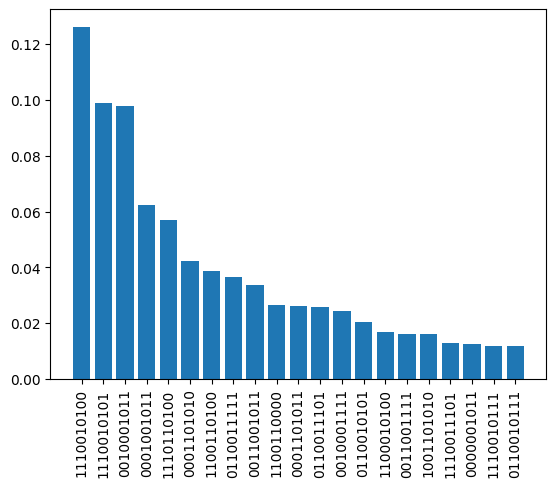

In [8]:
## initialisation ##
seed = 13164; beta = 1.12134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

#### Data

In [25]:
seeds10q = [23564,178064,32164,143264,13164]
betas10q = [1.0134,1.0134,1.0134,1.5634,1.12134]

In [10]:
DATA_10qubit = {}; iter = 0
for seed, beta in tqdm(zip(seeds10q, betas10q)):
    iter += 1
    tdata = run_sampling_task(nspin, seed, beta, 10000)
    DATA_10qubit[iter] = tdata
    
DATA_10qubit = pd.DataFrame(DATA_10qubit)
DATA_10qubit.to_json("SamplingData/DATA_10qubit.json")

5it [08:11, 98.27s/it]


In [26]:
## load data-file
with open("SamplingData/DATA_10qubit.json", 'rb') as hndl:
    DATA_10qubit = json.load(hndl)

##REDO classical-local and store relevant data
iter = 0
for seed, beta in tqdm(zip(seeds10q, betas10q)):
    iter += 1
    tdata_jls = get_sampling_data_just_local_sampling(nspin, seed, beta, 10000)
    DATA_10qubit[str(iter)]['classical-local'] = tdata_jls
    
## save data-file
# with open("SamplingData/DATA_10qubit.json", 'wb') as hndl:
#     json.dump()
DATA_10qubit = pd.DataFrame(DATA_10qubit)
DATA_10qubit.to_json("SamplingData/DATA_10qubit.json")

0it [00:00, ?it/s]

starting with:  0001011100 with energy: -6.825000000000001


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 60958.94it/s]
1it [00:00,  2.49it/s]

starting with:  0101111111 with energy: -8.926


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 115379.65it/s]
2it [00:00,  2.84it/s]

starting with:  1010011111 with energy: -6.569000000000001


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 122275.43it/s]
3it [00:01,  2.99it/s]

starting with:  0001000110 with energy: -9.129


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 129160.82it/s]
4it [00:01,  3.07it/s]

starting with:  0010001011 with energy: -8.511


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 110287.90it/s]
5it [00:01,  3.01it/s]


### **15 Qubits**

In [27]:
DATA_15qubit = {}; nspin = 15

#### Experiments

     MODEL : param_model |  beta : 1.02834
Num Most Probable States : 20
Entropy : 6.721395104173218
---------------------------------------------


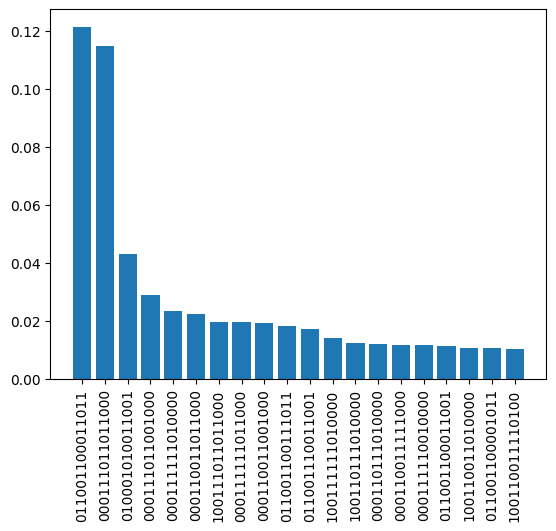

In [4]:
## initialisation ##
seed = 14797; beta = 1.02834
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

#### Data

In [28]:
seeds15q = [23564, 40217, 4036997, 98997, 14797]
betas15q = [1.02834, 1.02834, 1.02834, 1.02834, 1.02834]

In [ ]:
DATA_15qubit = {}; iter = 0
for seed, beta in tqdm(zip(seeds15q, betas15q)):
    iter += 1
    tdata = run_sampling_task(nspin, seed, beta, 10000)
    DATA_15qubit[iter] = tdata

DATA_15qubit = pd.DataFrame(DATA_15qubit)
DATA_15qubit.to_json("SamplingData/DATA_15qubit.json")

0it [00:00, ?it/s]

starting with:  010100011010101 with energy: -7.018



running MCMC steps ...: 100%|██████████| 20000/20000 [00:00<00:00, 44556.29it/s]


starting with:  010100011010101 with energy: -7.018



runnning quantum MCMC steps . ..:  30%|██▉       | 5987/20000 [26:19<44:12,  5.28it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)


runnning quantum MCMC steps . ..:  50%|████▉     | 9985/20000 [43:33<46:54,  3.56it/s]

In [31]:
## load data-file
with open("SamplingData/DATA_15qubit.json", 'rb') as hndl:
    DATA_15qubit = json.load(hndl)

##REDO classical-local and store relevant data
iter = 1
for seed, beta in tqdm(zip(seeds15q[1:], betas15q[1:])):
    iter += 1
    tdata_jls = get_sampling_data_just_local_sampling(nspin, seed, beta, 10000)
    DATA_15qubit[str(iter)]['classical-local'] = tdata_jls
    
## save data-file
# with open("SamplingData/DATA_15qubit.json", 'wb') as hndl:
#     json.dump()
DATA_15qubit = pd.DataFrame(DATA_15qubit)
DATA_15qubit.to_json("SamplingData/DATA_15qubit.json")

0it [00:00, ?it/s]

starting with:  101000010100010 with energy: -13.721000000000002


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 124298.88it/s]
1it [00:02,  2.90s/it]

starting with:  011011010110101 with energy: -15.243000000000002


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 124878.79it/s]
2it [00:05,  2.86s/it]

starting with:  010011100011010 with energy: -17.053


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 122971.27it/s]
3it [00:08,  2.87s/it]

starting with:  010001000001001 with energy: -13.620000000000003


running MCMC steps ...: 100%|██████████| 10000/10000 [00:00<00:00, 124058.07it/s]
4it [00:11,  2.87s/it]


### **20 Qubits**

In [ ]:
DATA_20qubit = {}; nspin = 20

#### Experiments

     MODEL : param_model |  beta : 1.02834
Num Most Probable States : 17
Entropy : 7.55483893625457
---------------------------------------------


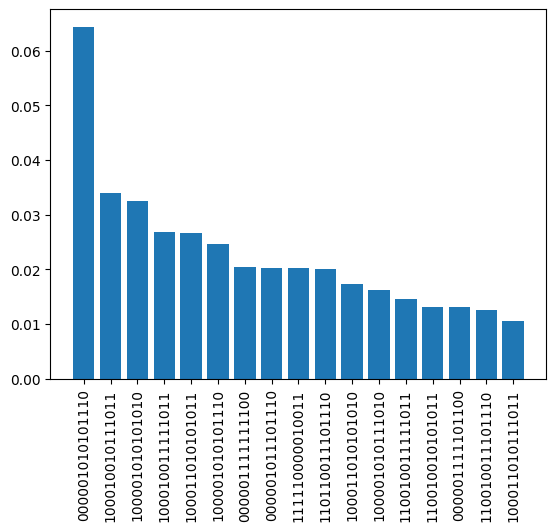

In [ ]:
## initialisation ##
seed = 9178; beta = 1.02834
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

#### Data

In [ ]:
seeds20q = [54797, 7497, 4917, 49178, 9178]
betas20q = [1.02834, 1.02834, 1.02834, 1.02834, 1.02834]

In [ ]:
DATA_20qubit = {}; iter = 0
for seed, beta in tqdm(zip(seeds20q, betas20q)):
    iter += 1
    tdata = run_sampling_task(nspin, seed, beta, 20000)
    DATA_20qubit[iter] = tdata

DATA_20qubit = pd.DataFrame(DATA_20qubit)
DATA_20qubit.to_json("SamplingData/DATA_20qubit.json")